In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Aim is to predict the marks of students of the test data

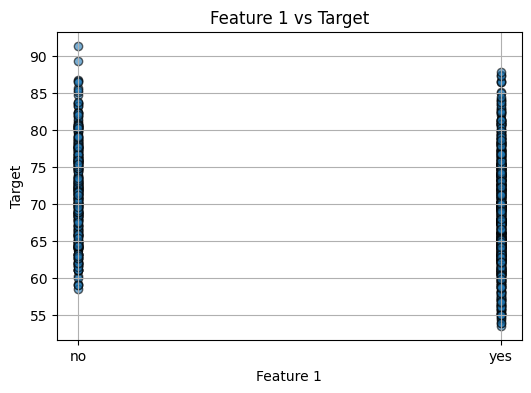

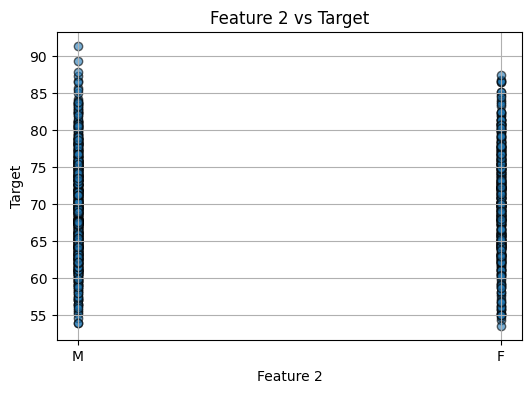

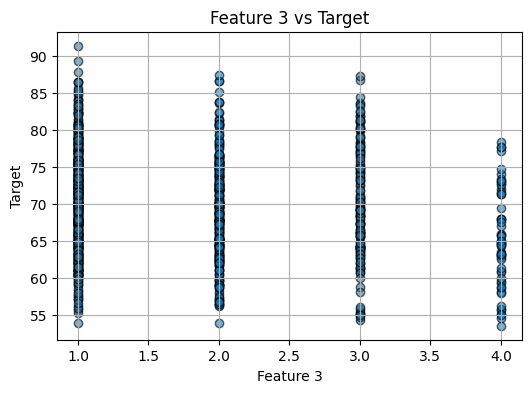

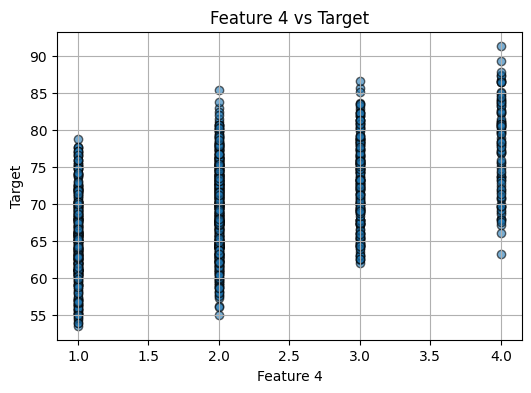

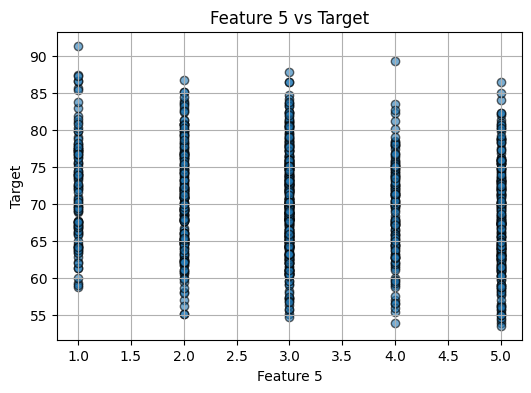

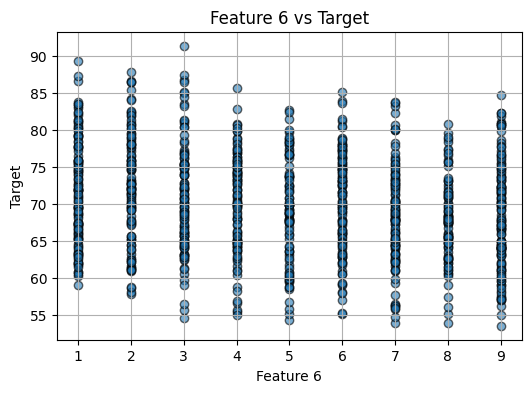

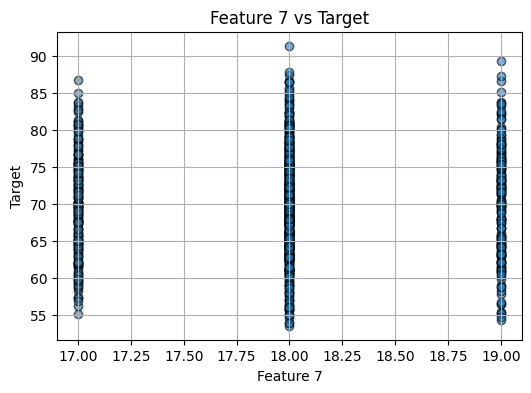

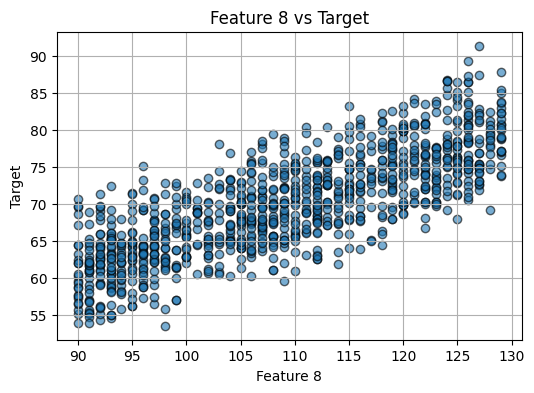

In [35]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
def plot_features(x_train, y_train):
    num_features = x_train.shape[1]
    for i in range(num_features):
        plt.figure(figsize=(6, 4))
        plt.scatter(x_train[:, i], y_train, alpha=0.6, edgecolor='k')
        plt.title(f'Feature {i+1} vs Target')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Target')
        plt.grid()
        plt.show()

plot_features(x_train, y_train)

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
# def label_encode(x_train, data):
#     le = LabelEncoder()
#     for i in range(x_train.shape[1]):
#         if data.iloc[:, i].dtype == 'object':  # Check if the column is categorical
#             x_train[:, i] = le.fit_transform(data.iloc[:, i])
#     return x_train.astype(float)

# x_train = label_encode(x_train, data)
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

def feature_changing(x_train):
    """Convert categorical features to numerical and add additional features if required."""
    df = pd.DataFrame(x_train, columns=['internet', 'sex', 'traveltime', 'studytime', 'freetime', 'absences', 'age', 'iq'])

    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['internet'] = label_encoder.fit_transform(df['internet'])  # yes/no -> 1/0
    df['sex'] = label_encoder.fit_transform(df['sex'])  # M/F -> 1/0

    # Convert DataFrame back to numpy array
    x_train = df.to_numpy(dtype=np.float64)
    return x_train

x_train = feature_changing(x_train)

In [36]:
def z_score(x_train):
    """Apply z-score normalization."""
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

In [37]:
def cost(x_train, y_train, w, b):
    """Compute Mean Squared Error cost."""
    m = y_train.shape[0]
    predictions = np.dot(x_train, w) + b
    loss = np.sum((predictions - y_train) ** 2) / (2 * m)
    return loss

In [39]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
    learning_rate=0.01
    epochs=1000
    m = y_train.shape[0]  # Number of training examples

    for epoch in range(epochs):
        # Predictions
        y_pred = np.dot(x_train, w) + b

        # Compute gradients
        dw = (1 / m) * np.dot(x_train.T, (y_pred - y_train))  # Gradient of weights
        db = (1 / m) * np.sum(y_pred - y_train)              # Gradient of bias

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Optional: Print the cost for monitoring
        if epoch % 10 == 0:
            loss = np.sum((y_pred - y_train) ** 2) / (2 * m)  # Compute cost
            print(f"Epoch {epoch}: Loss = {loss}")

    return w,b

In [40]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

test_data = pd.read_excel('Test data.xlsx')
x_predict = test_data.iloc[:,:8].to_numpy()
# x_predict = label_encode(x_predict, test_data)
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Epoch 0: Loss = 2493.6788577577954
Epoch 10: Loss = 2039.495490466726
Epoch 20: Loss = 1668.0361930524148
Epoch 30: Loss = 1364.2334071378514
Epoch 40: Loss = 1115.7640828984693
Epoch 50: Loss = 912.5497626012794
Epoch 60: Loss = 746.3477271309933
Epoch 70: Loss = 610.4166173340827
Epoch 80: Loss = 499.24296382524915
Epoch 90: Loss = 408.3175302234617
Epoch 100: Loss = 333.95239590394607
Epoch 110: Loss = 273.1313572849647
Epoch 120: Loss = 223.38757848841854
Epoch 130: Loss = 182.70352777616225
Epoch 140: Loss = 149.42914033080447
Epoch 150: Loss = 122.21488740928076
Epoch 160: Loss = 99.95703665443206
Epoch 170: Loss = 81.75288294280655
Epoch 180: Loss = 66.86413364424742
Epoch 190: Loss = 54.68696298293704
Epoch 200: Loss = 44.72752074297192
Epoch 210: Loss = 36.58190183155129
Epoch 220: Loss = 29.9197641771064
Epoch 230: Loss = 24.47093044031422
Epoch 240: Loss = 20.014430057612465
Epoch 250: Loss = 16.36953713038041
Epoch 260: Loss = 13.388440634613216
Epoch 270: Loss = 10.9502496